In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import validation_curve
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

#### Data Processing

In [119]:
data = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Studen prformace engineering/DATA (1).csv')


In [120]:
column_labels = [
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers' education",
    "Fathers' education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers' occupation",
    "Fathers' occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester (/4.00)",
    "Expected Cumulative grade point average in graduation (/4.00)",
    "Course ID",
    "GRADE"
]

In [121]:
data = data.drop('STUDENT ID', axis=1)

In [123]:
data

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


In [124]:
# Assuming you have a dataframe df with a 'GRADE' column
threshold = 6
classifieddata = data
classifieddata['GRADE'] = classifieddata['GRADE'].apply(lambda x: 1 if x > threshold else 0 )

In [125]:
classifieddata
unique_value_counts = classifieddata['GRADE'].value_counts()
unique_value_counts


GRADE
0    128
1     17
Name: count, dtype: int64

In [126]:
classifieddata
unique_value_counts = data['GRADE'].value_counts()
unique_value_counts

GRADE
0    128
1     17
Name: count, dtype: int64

In [127]:
classifieddata.columns  = column_labels

In [128]:
classifieddata

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in graduation (/4.00),Course ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,0
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,0
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,0
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,0
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,0
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,0
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,0
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,0


#### Decision Tree Algorithm

In [129]:

# Let's say you want to predict a column named 'target' and the rest are features
X = classifieddata.drop('GRADE', axis=1)
y = classifieddata['GRADE']
print(X.shape)
print(y.shape)

(145, 31)
(145,)


In [130]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(108, 31)
(37, 31)


In [145]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)


#y_train_pred = clf.predict(x_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8648648648648649


In [150]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.00      0.00      0.00         4

    accuracy                           0.86        37
   macro avg       0.44      0.48      0.46        37
weighted avg       0.79      0.86      0.83        37



In [142]:
# Get the feature importances
feature_importances = clf.feature_importances_

# Create a dictionary to map feature names to their importances
feature_importance_dict = {feature: importance for feature, importance in zip(x_train.columns, feature_importances)}

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the top features and their importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Sex: 0.2633030852994555
Reading frequency (non-scientific books/journals): 0.1252747252747252
Parental status: 0.12351472846572666
Course ID: 0.10947368421052642
Cumulative grade point average in the last semester (/4.00): 0.10671602082128395
Weekly study hours: 0.081203007518797
Fathers' education: 0.06558704453441294
Reading frequency (scientific books/journals): 0.05205320994794678
Number of sisters/brothers: 0.043724696356275294
Accommodation type in Cyprus: 0.0291497975708502
Student Age: 0.0
Graduated high-school type: 0.0
Scholarship type: 0.0
Additional work: 0.0
Regular artistic or sports activity: 0.0
Do you have a partner: 0.0
Total salary if available: 0.0
Transportation to the university: 0.0
Mothers' education: 0.0
Mothers' occupation: 0.0
Fathers' occupation: 0.0
Attendance to the seminars/conferences related to the department: 0.0
Impact of your projects/activities on your success: 0.0
Attendance to classes: 0.0
Preparation to midterm exams 1: 0.0
Preparation to midterm

In [137]:
grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0),
{
    'max_depth':np.arange(1,100,1),
    'max_features':np.arange(0.1,1.0,0.05),
    'criterion':['gini','entropy']
    ''

},cv=5, scoring="r2",verbose=1,n_jobs=-1
)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 3564 candidates, totalling 17820 fits


{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.6500000000000001}


In [138]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.6500000000000001}


In [157]:
from sklearn import tree
import matplotlib.pyplot as plt

clfgs = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1, max_features=0.65)
clfgs.fit(x_train,y_train)


#y_train_pred = clf.predict(x_train)
y_pred = clfgs.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8918918918918919


In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       0.00      0.00      0.00         4

    accuracy                           0.89        37
   macro avg       0.45      0.50      0.47        37
weighted avg       0.80      0.89      0.84        37



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Parameters Testing


#### Learning curve

#### Max_Depth


In [139]:

clf = tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.01, max_depth = 4)
clf.fit(x_train,y_train)


#y_train_pred = clf.predict(x_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8648648648648649


##### MAX DEPTH LEARNING CURVE

In [160]:
# Define different training set sizes (e.g., 10%, 20%, ..., 90% of the data)
train_sizes, train_scores, test_scores = learning_curve(
    clf, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


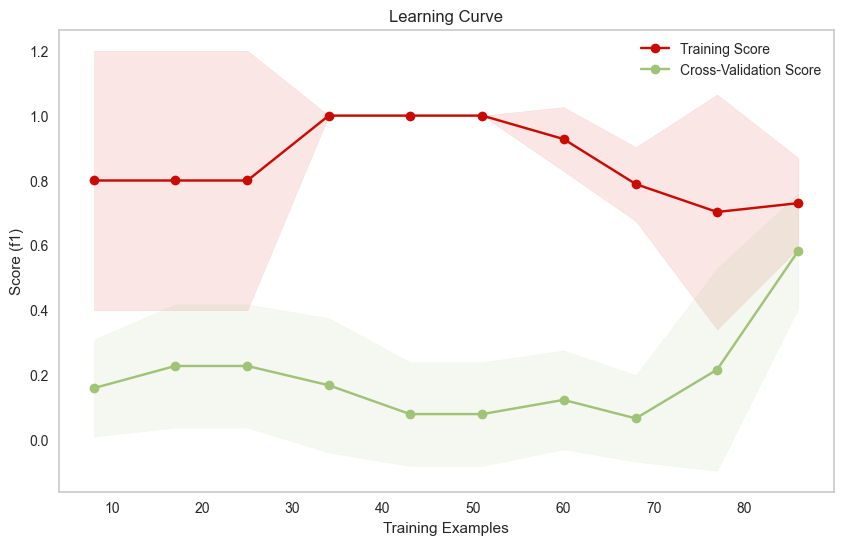

In [162]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (f1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

In [82]:

# Get the feature importances
feature_importances = clf.feature_importances_

# Create a dictionary to map feature names to their importances
feature_importance_dict = {feature: importance for feature, importance in zip(x_train.columns, feature_importances)}

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the top features and their importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Sex: 0.520894961690677
Course ID: 0.25838043734656635
Fathers' occupation: 0.22072460096275665
Student Age: 0.0
Graduated high-school type: 0.0
Scholarship type: 0.0
Additional work: 0.0
Regular artistic or sports activity: 0.0
Do you have a partner: 0.0
Total salary if available: 0.0
Transportation to the university: 0.0
Accommodation type in Cyprus: 0.0
Mothers' education: 0.0
Fathers' education: 0.0
Number of sisters/brothers: 0.0
Parental status: 0.0
Mothers' occupation: 0.0
Weekly study hours: 0.0
Reading frequency (non-scientific books/journals): 0.0
Reading frequency (scientific books/journals): 0.0
Attendance to the seminars/conferences related to the department: 0.0
Impact of your projects/activities on your success: 0.0
Attendance to classes: 0.0
Preparation to midterm exams 1: 0.0
Preparation to midterm exams 2: 0.0
Taking notes in classes: 0.0
Listening in classes: 0.0
Discussion improves my interest and success in the course: 0.0
Flip-classroom: 0.0
Cumulative grade point 

max_depth is pre-pruning.

ccp_alpha is post-pruning

[Text(0.3333333333333333, 0.875, 'x[30] <= 2.5\ngini = 0.212\nsamples = 108\nvalue = [95, 13]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.5, 0.625, 'x[1] <= 1.5\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.6666666666666666, 0.375, 'x[15] <= 2.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.5, 0.125, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]')]

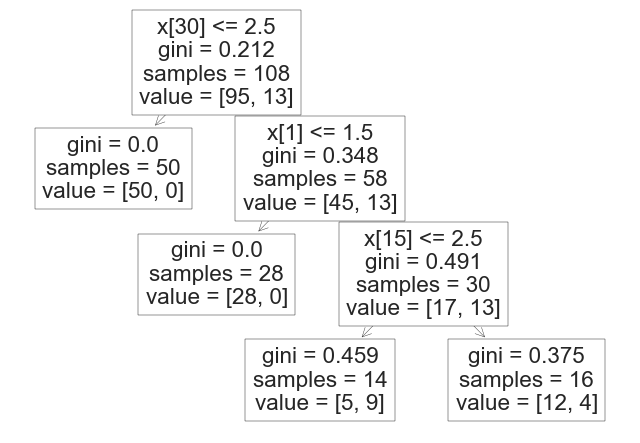

In [83]:
tree.plot_tree(clf)

In [21]:
# Define different training set sizes (e.g., 10%, 20%, ..., 90% of the data)
train_sizes, train_scores, test_scores = learning_curve(
    clf, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

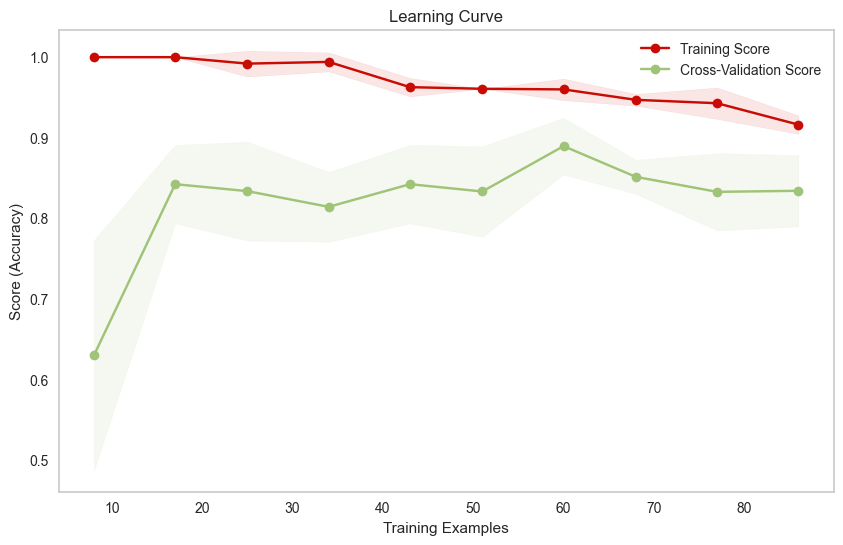

In [22]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

#### CCp_alpha (Post Pruning)


In [24]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

NameError: name 'DecisionTreeClassifier' is not defined

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

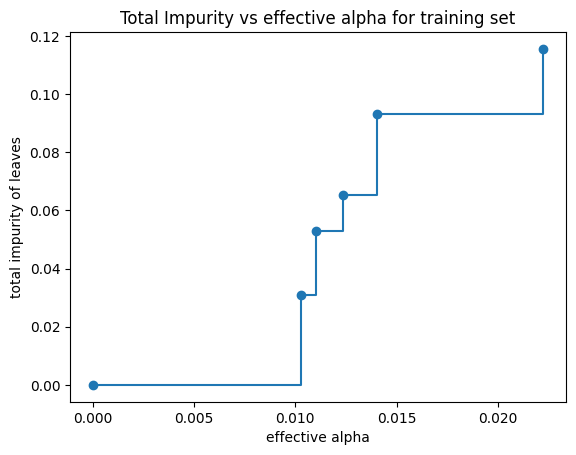

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)



Number of nodes in the last tree is: 1 with ccp_alpha: 0.048103566529492485


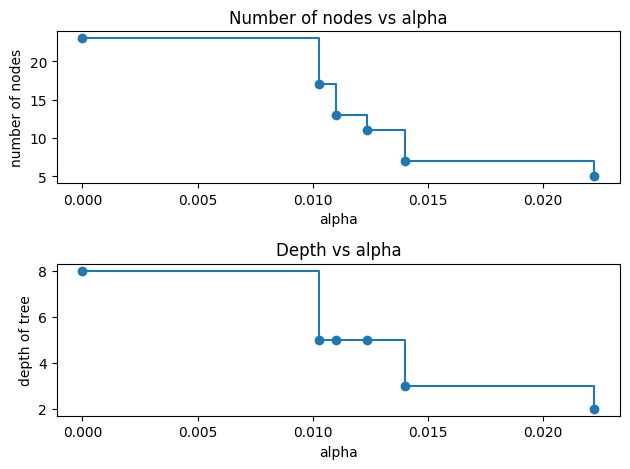

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

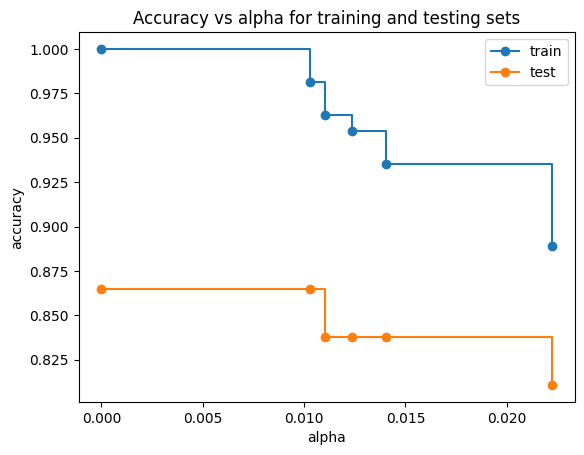

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Validation Curve

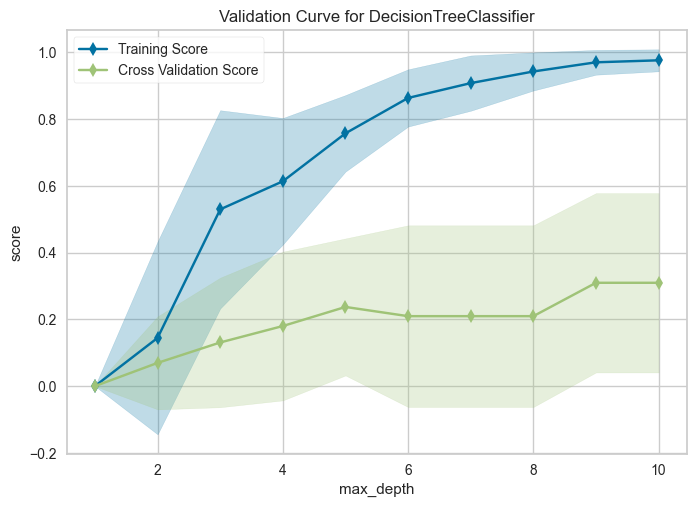

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=5,
                estimator=DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=4, max_features=0.65,
                                                 random_state=0),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='f1')


In [172]:
print(validation_curve(clf, X, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=5, scoring="f1"))

#### Max_features

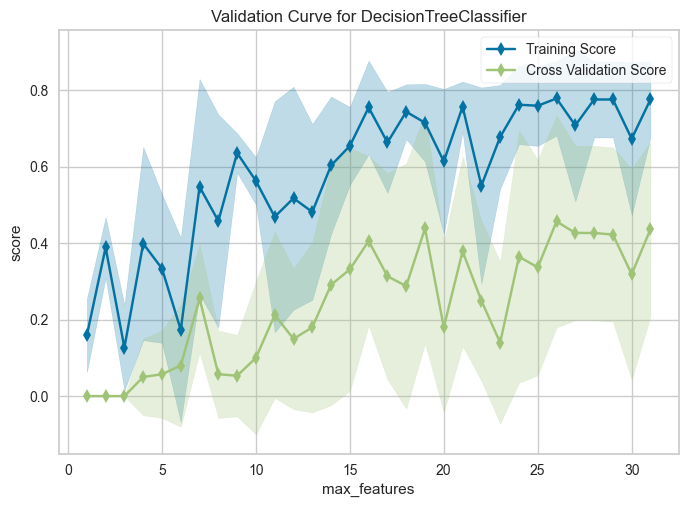

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for DecisionTreeClassifier'}, xlabel='max_features', ylabel='score'>,
                cv=5,
                estimator=DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=4, max_features=0.65,
                                                 random_state=0),
                n_jobs=5, param_name='max_features',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                scoring='f1')


In [171]:
print(validation_curve(clf, X, y, param_name="max_features", n_jobs=5,
      param_range=np.arange(1, 32), cv=5, scoring="f1"))

### Extra

In [ ]:
import numpy as np

def calculate_entropy(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    total_instances = len(labels)
    entropy = 0
    for count in label_counts:
        probability = count / total_instances
        entropy -= probability * np.log2(probability)
    return entropy

def calculate_information_gain(parent_labels, child_labels_list):
    parent_entropy = calculate_entropy(parent_labels)
    total_instances = len(parent_labels)
    child_entropies = []
    for child_labels in child_labels_list:
        child_weight = len(child_labels) / total_instances
        child_entropy = calculate_entropy(child_labels)
        child_entropies.append(child_weight * child_entropy)
    information_gain = parent_entropy - sum(child_entropies)
    return information_gain

# Example usage
parent_labels = np.array([0, 1, 1, 0, 0, 1, 1, 0])
child_labels_1 = np.array([0, 0, 1, 1])
child_labels_2 = np.array([1, 0, 1, 0, 0])
child_labels_list = [child_labels_1, child_labels_2]

information_gain = calculate_information_gain(parent_labels, child_labels_list)
print("Information Gain:", information_gain)

Information Gain: -0.10684412153416778


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load example dataset (you should replace this with your data)
iris = load_iris()
X = iris.data
y = iris.target

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Calculate information gain for each feature
parent_entropy = calculate_entropy(y)  # Calculate entropy of parent node
feature_importances = []
for feature_idx in range(X.shape[1]):
    child_entropies = []
    for split_value in np.unique(X[:, feature_idx]):
        child_indices = X[:, feature_idx] == split_value
        child_entropy = calculate_entropy(y[child_indices])
        child_weight = sum(child_indices) / len(y)
        child_entropies.append(child_weight * child_entropy)
    feature_importance = parent_entropy - sum(child_entropies)
    feature_importances.append(feature_importance)

# Normalize the feature importances
total_importance = sum(feature_importances)
normalized_importances = [importance / total_importance for importance in feature_importances]

# Display feature importances
for feature_idx, importance in enumerate(normalized_importances):
    print(f"Feature {feature_idx}: Importance {importance}")

Feature 0: Importance 0.20509347380574236
Feature 1: Importance 0.12082966857167714
Feature 2: Importance 0.3382567619299488
Feature 3: Importance 0.33582009569263166


[Text(0.2692307692307692, 0.9444444444444444, 'x[30] <= 2.5\ngini = 0.212\nsamples = 108\nvalue = [95, 13]'),
 Text(0.19230769230769232, 0.8333333333333334, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.34615384615384615, 0.8333333333333334, 'x[1] <= 1.5\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.2692307692307692, 0.7222222222222222, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.4230769230769231, 0.7222222222222222, 'x[15] <= 2.5\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.15384615384615385, 0.6111111111111112, 'x[17] <= 1.5\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.5, 'x[25] <= 1.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.15384615384615385, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.3888888888888889, 'x[0] <= 1.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.23

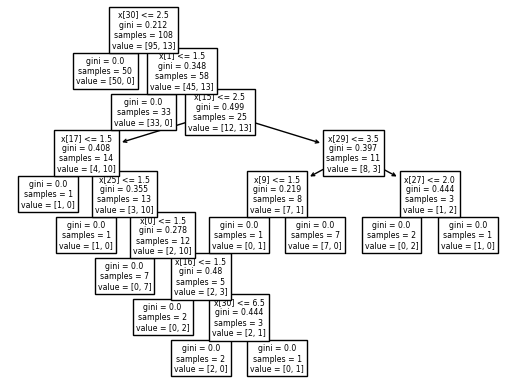

In [ ]:
tree.plot_tree(clf)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Define different training set sizes (e.g., 10%, 20%, ..., 90% of the data)
train_sizes, train_scores, test_scores = learning_curve(
    clf, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


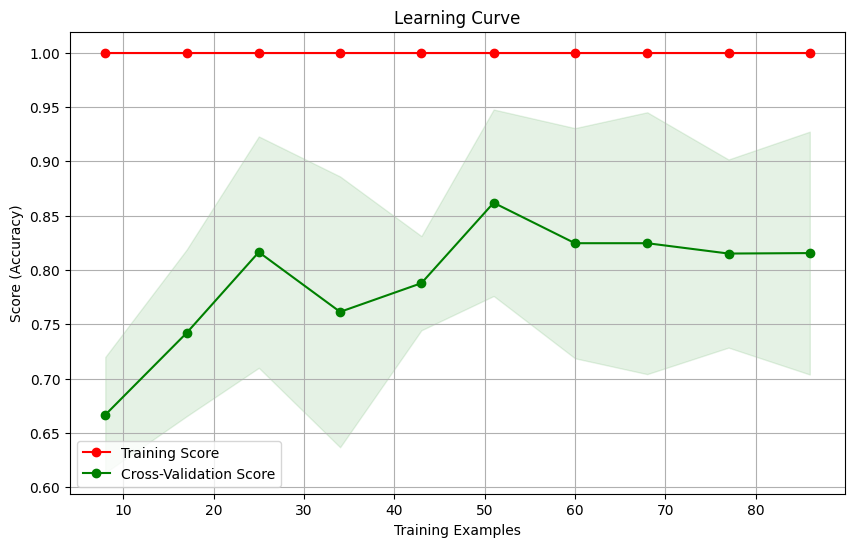

In [ ]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

Seems as though introducing more data will help here as the trendline for the cross validation score keeps going up as the number of training examples is increased.

In [ ]:
print(train_sizes)
print(train_scores_mean)

[ 8 17 25 34 43 51 60 68 77 86]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


[Text(0.2692307692307692, 0.9444444444444444, 'x[30] <= 2.5\ngini = 0.212\nsamples = 108\nvalue = [95, 13]'),
 Text(0.19230769230769232, 0.8333333333333334, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.34615384615384615, 0.8333333333333334, 'x[1] <= 1.5\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.2692307692307692, 0.7222222222222222, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.4230769230769231, 0.7222222222222222, 'x[15] <= 2.5\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.15384615384615385, 0.6111111111111112, 'x[17] <= 1.5\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.5, 'x[25] <= 1.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.15384615384615385, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.3888888888888889, 'x[0] <= 1.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.23

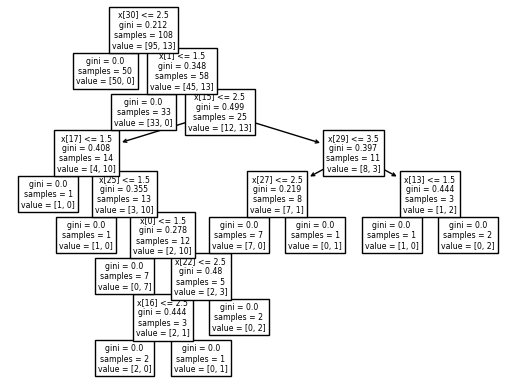

In [ ]:
tree.plot_tree(clf)

In [ ]:
from sklearn.metrics import accuracy_score

# Use the trained classifier to make predictions on testing data
y_pred = clf.predict(x_test)  # X_test should be your testing feature data

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)  # y_test should be your testing target labels

print("Accuracy on testing data:", accuracy)



Accuracy on testing data: 0.8648648648648649


In [ ]:
clf.predict()

TypeError: BaseDecisionTree.predict() missing 1 required positional argument: 'X'

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,20))
features = classifieddata.columns[:-1] 
classes = ['good','bad']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type',
       'Additional work', 'Regular artistic or sports activity',
       'Do you have a partner', 'Total salary if available',
       'Transportation to the university', 'Accommodation type in Cyprus',
       'Mothers' education', 'Fathers' education',
       'Number of sisters/brothers', 'Parental status', 'Mothers' occupation',
       'Fathers' occupation', 'Weekly study hours',
       'Reading frequency (non-scientific books/journals)',
       'Reading frequency (scientific books/journals)',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumulative grade point average in graduation (/4.00)',
       'Course ID'],
      dtype='object') instead.

<Figure size 2000x2000 with 0 Axes>

In [ ]:

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

### Cnfusion Matrix

True Positive, True Negative, False Positive, and False Negative values.

In [91]:
confusion_matrix(y_test, y_pred)

array([[31,  2],
       [ 2,  2]])

In [92]:
#extracting TN, TP, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)


(31, 2, 2, 2)

In [94]:
#Confusion matrix metrics
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print('classification report : \n', matrix)

classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.50      0.50      0.50         4

    accuracy                           0.89        37
   macro avg       0.72      0.72      0.72        37
weighted avg       0.89      0.89      0.89        37



CONFUSION SCORES WITH PLOTS

In [ ]:

model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

NameError: name 'gcv' is not defined

In [ ]:
TestScorePath = '/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/test_scores.csv'


In [ ]:
TestScoreData = pd.read_csv(TestScorePath)


In [ ]:
TestScoreData

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [ ]:

# Let's say you want to predict a column named 'target' and the rest are features
X = TestScoreData.drop('GRADE', axis=1)
y = TestScoreData['GRADE']
print(X.shape)
print(y.shape)
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

NameError: name 'TestScoreData' is not defined

# Adult Dataset

## Preprocessing

In [71]:
adult_test = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/Adult_Test.csv')
adult_train = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/Adult_Train.csv')

In [72]:
print(adult_test['income'].unique())
print(adult_train['income'].unique())

[' <=50K.' ' >50K.']
[' <=50K' ' >50K']


In [63]:
#adult_train['income'] = adult_train['income'].str.replace('.', '')
#adult_test['income'] = adult_test['income'].str.replace('.', '')
# Show the updated DataFrame
#adult_train

In [73]:
adult_train['income'] = adult_train['income'].map({' >50K': 1, ' <=50K': 0})
adult_test['income'] = adult_test['income'].map({' >50K.': 1, ' <=50K.': 0})



In [75]:
adult_train.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [76]:
adult_test.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [80]:

# Let's say you want to predict a column named 'target' and the rest are features
X2_train = adult_train.drop('income', axis=1)
y2_train = adult_train['income']
print(X.shape)
print(y.shape)

# Let's say you want to predict a column named 'target' and the rest are features
X2_test = adult_test.drop('income', axis=1)
y2_test = adult_test['income']
print(X2_test.shape)
print(y2_test.shape)

(32561, 15)
(32561,)
(16281, 15)
(16281,)


In [81]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all the columns in the DataFrame and apply Label Encoding
# to columns with object (string) dtype
for col in X2_train.select_dtypes(include=['object']).columns:
    X2_train[col] = le.fit_transform(X2_train[col])




# Iterate over all the columns in the DataFrame and apply Label Encoding
# to columns with object (string) dtype
for col in X2_test.select_dtypes(include=['object']).columns:
    X2_test[col] = le.fit_transform(X2_test[col])



In [89]:
X2_test.to_csv(r'/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Test.csv', index = True)
X2_train.to_csv(r'/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Train.csv', index = True)   
y2_test.to_csv(r'/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Test.csv', index = True) 
y2_train.to_csv(r'/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Train.csv', index = True)   

## GridSearch Max Depth : 7, Max_features: 0.8000000000000002 ------    Fitting 5 folds for each of 1782 candidates, totalling 8910 fits

In [182]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=7, max_features=0.8)
clf.fit(X2_train,y2_train)



DecisionTreeClassifier(max_depth=7, max_features=0.8, random_state=0)

In [185]:
y2_pred = clf.predict(X2_test)
accuracy = accuracy_score(y2_pred, y2_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8561513420551563


In [186]:

print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12435
           1       0.79      0.53      0.63      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.74      0.77     16281
weighted avg       0.85      0.86      0.85     16281



In [86]:
grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0),
{
    'max_depth':np.arange(1,100,1),
    'max_features':np.arange(0.1,1.0,0.05),

},cv=5, scoring="r2",verbose=1,n_jobs=-1
)
grid_search.fit(X2_train,y2_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 1782 candidates, totalling 8910 fits


{'max_depth': 7, 'max_features': 0.8000000000000002}


## Validation curve Max-Depth

In [192]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X2_train,y2_train)



DecisionTreeClassifier(random_state=0)

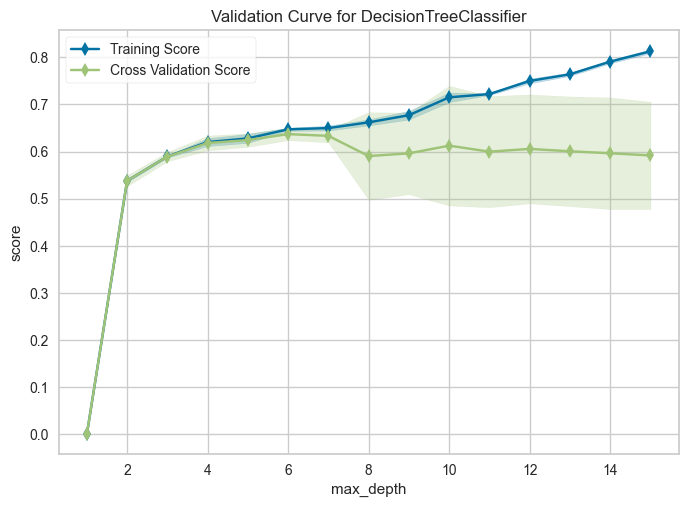

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=5, estimator=DecisionTreeClassifier(random_state=0),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                scoring='f1')


In [189]:
print(validation_curve(clf, X2_train, y2_train, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 16), cv=5, scoring="f1"))

## Validation Max Features

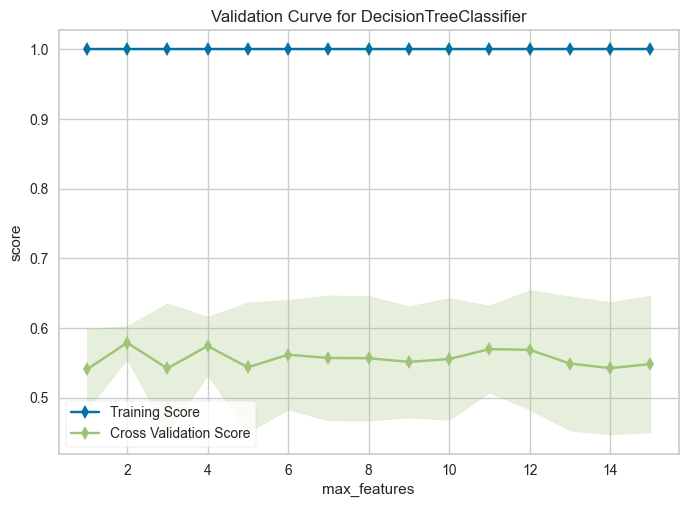

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for DecisionTreeClassifier'}, xlabel='max_features', ylabel='score'>,
                cv=5, estimator=DecisionTreeClassifier(random_state=0),
                n_jobs=-1, param_name='max_features',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                scoring='f1')


In [193]:
print(validation_curve(clf, X2_train, y2_train, param_name="max_features", n_jobs=-1,
      param_range=np.arange(1, 16), cv=5, scoring="f1"))

# BREAK


## TestSCores Dataset